<a href="https://colab.research.google.com/github/italovinicius18/DesafioTractian/blob/main/Tractian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Scientist (Python Specialist)

Desafios (em Python):

- Fazer a Análise Espectral (fft e harmônicos) da geladeira
e identificar padrões entre coletas;

- Fazer um Algoritmo que calcula automaticamente quanto tempo a geladeira ficou ligada (uptime) e quanto tempo ela ficou desligada (downtime).

- Fazer sua análise sobre a condição do compressor da geladeira, está desbalanceado? Desalinhado? Que condição se encontra.


Primeiramente, eu monto o meu drive no notebook e acesso os arquivos das coletas da geladeira

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Faço a importação das bibliotecas necessárias:
  - glob: Tem como função acessar de uma forma mais fácil os arquivos que serão analisados
  - pandas: Sevre para abrir os CSVs e disponibilizar e analizar de uma maneira mais fácil, manipulando os dataframes da forma correta
  - time: Serve para manipular os dados das épocas, assim facilita na compreenssão dos dados
  - numpy: Nesse caso, vai servir para distribuir os dados em um certo intervalo de tempo

In [ ]:
import glob
import pandas as pd
import time
import numpy as np

Vou criar uma lista com os nomes dos arquivos e seu respectivos dataframes

In [ ]:
df = []
registros = []

for file in glob.glob('./drive/MyDrive/Tractian/Coletas-Geladeira/*.csv'):
  timestamp = file.split('/')[-1] # Pega o nome do arquivo
  timestamp = timestamp.split('.')[0] # Pega o nome do arquivo sem o .csv

  timestamp = list(map(int,timestamp.split('-')))

  inicio = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(timestamp[0]))
  fim = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(timestamp[1]))

  inicio = pd.Timestamp(inicio)
  fim = pd.Timestamp(fim)

  registros.append({'inicio':inicio,'fim':fim})

  df.append(pd.read_csv(file,names=["x","y","z"],usecols=[0, 1, 2])) # Vamos descartar o c pois não vamos utilizar

Abaixo se imprime os dados que armazenei já inserindo a coluna do tempo que foi distribuída a partir da função linspace do numpy

In [ ]:
for tempo, dado in zip(registros,df):
  t = np.linspace(tempo['inicio'].value,tempo['fim'].value,num=dado.shape[0])
  t = pd.to_datetime(t)

  dado['media'] = dado.mean(axis=1)

  titulo = '{} até {}'.format(tempo['inicio'],tempo['fim'])
  print(titulo)
  print(dado.describe())
  print()

2020-05-17 02:36:14 até 2020-05-17 02:37:08
                  x             y             z         media
count  12783.000000  12783.000000  12783.000000  12783.000000
mean      -9.274593      0.017443     -1.223315     -3.493488
std        0.435088      1.083840      1.097399      0.794144
min       -9.970000     -1.640000     -2.920000     -4.690000
25%       -9.730000     -1.050000     -2.370000     -4.263333
50%       -9.280000     -0.000000     -1.210000     -3.516667
75%       -8.820000      1.100000     -0.080000     -2.710000
max       -8.570000      1.670000      0.470000     -2.266667

2020-05-17 03:37:25 até 2020-05-17 03:38:33
                  x             y             z         media
count  12774.000000  12774.000000  12774.000000  12774.000000
mean      -9.279734      0.007757     -1.204024     -3.492000
std        0.385387      0.914880      0.987866      0.679232
min      -11.770000     -1.590000     -4.740000     -5.566667
25%       -9.660000     -0.720000     -2.03

# Desafio 1

Fazer a Análise Espectral (fft e harmônicos) da geladeira e identificar padrões entre coletas

  - Esta análise requer um lista unidimensional, ou seja, vamos que trabalhar com eixos específicos ou calcular uma média entre os três eixos, a qual será usada futuramente para detectar as possíveis condições do compressor da geladeira
  - A função abaixo irá fazer isso a partir da passagem de uma lista de valores como parâmetro

Importo as bibliotecas necessárias
  - scipy: Serve para facilitar na análise espectral FFT
  - MatplotLib: Serve para plotar os gráficos, facilitando a interpretação dos dados

In [ ]:
from scipy.fft import fft,fftfreq
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Análise espectral harmônica
Abaixo temos a análise espectral harmônica do compressor, tanto em diferentes coordenadas quanto na média que foi feita a partir das três dimensões

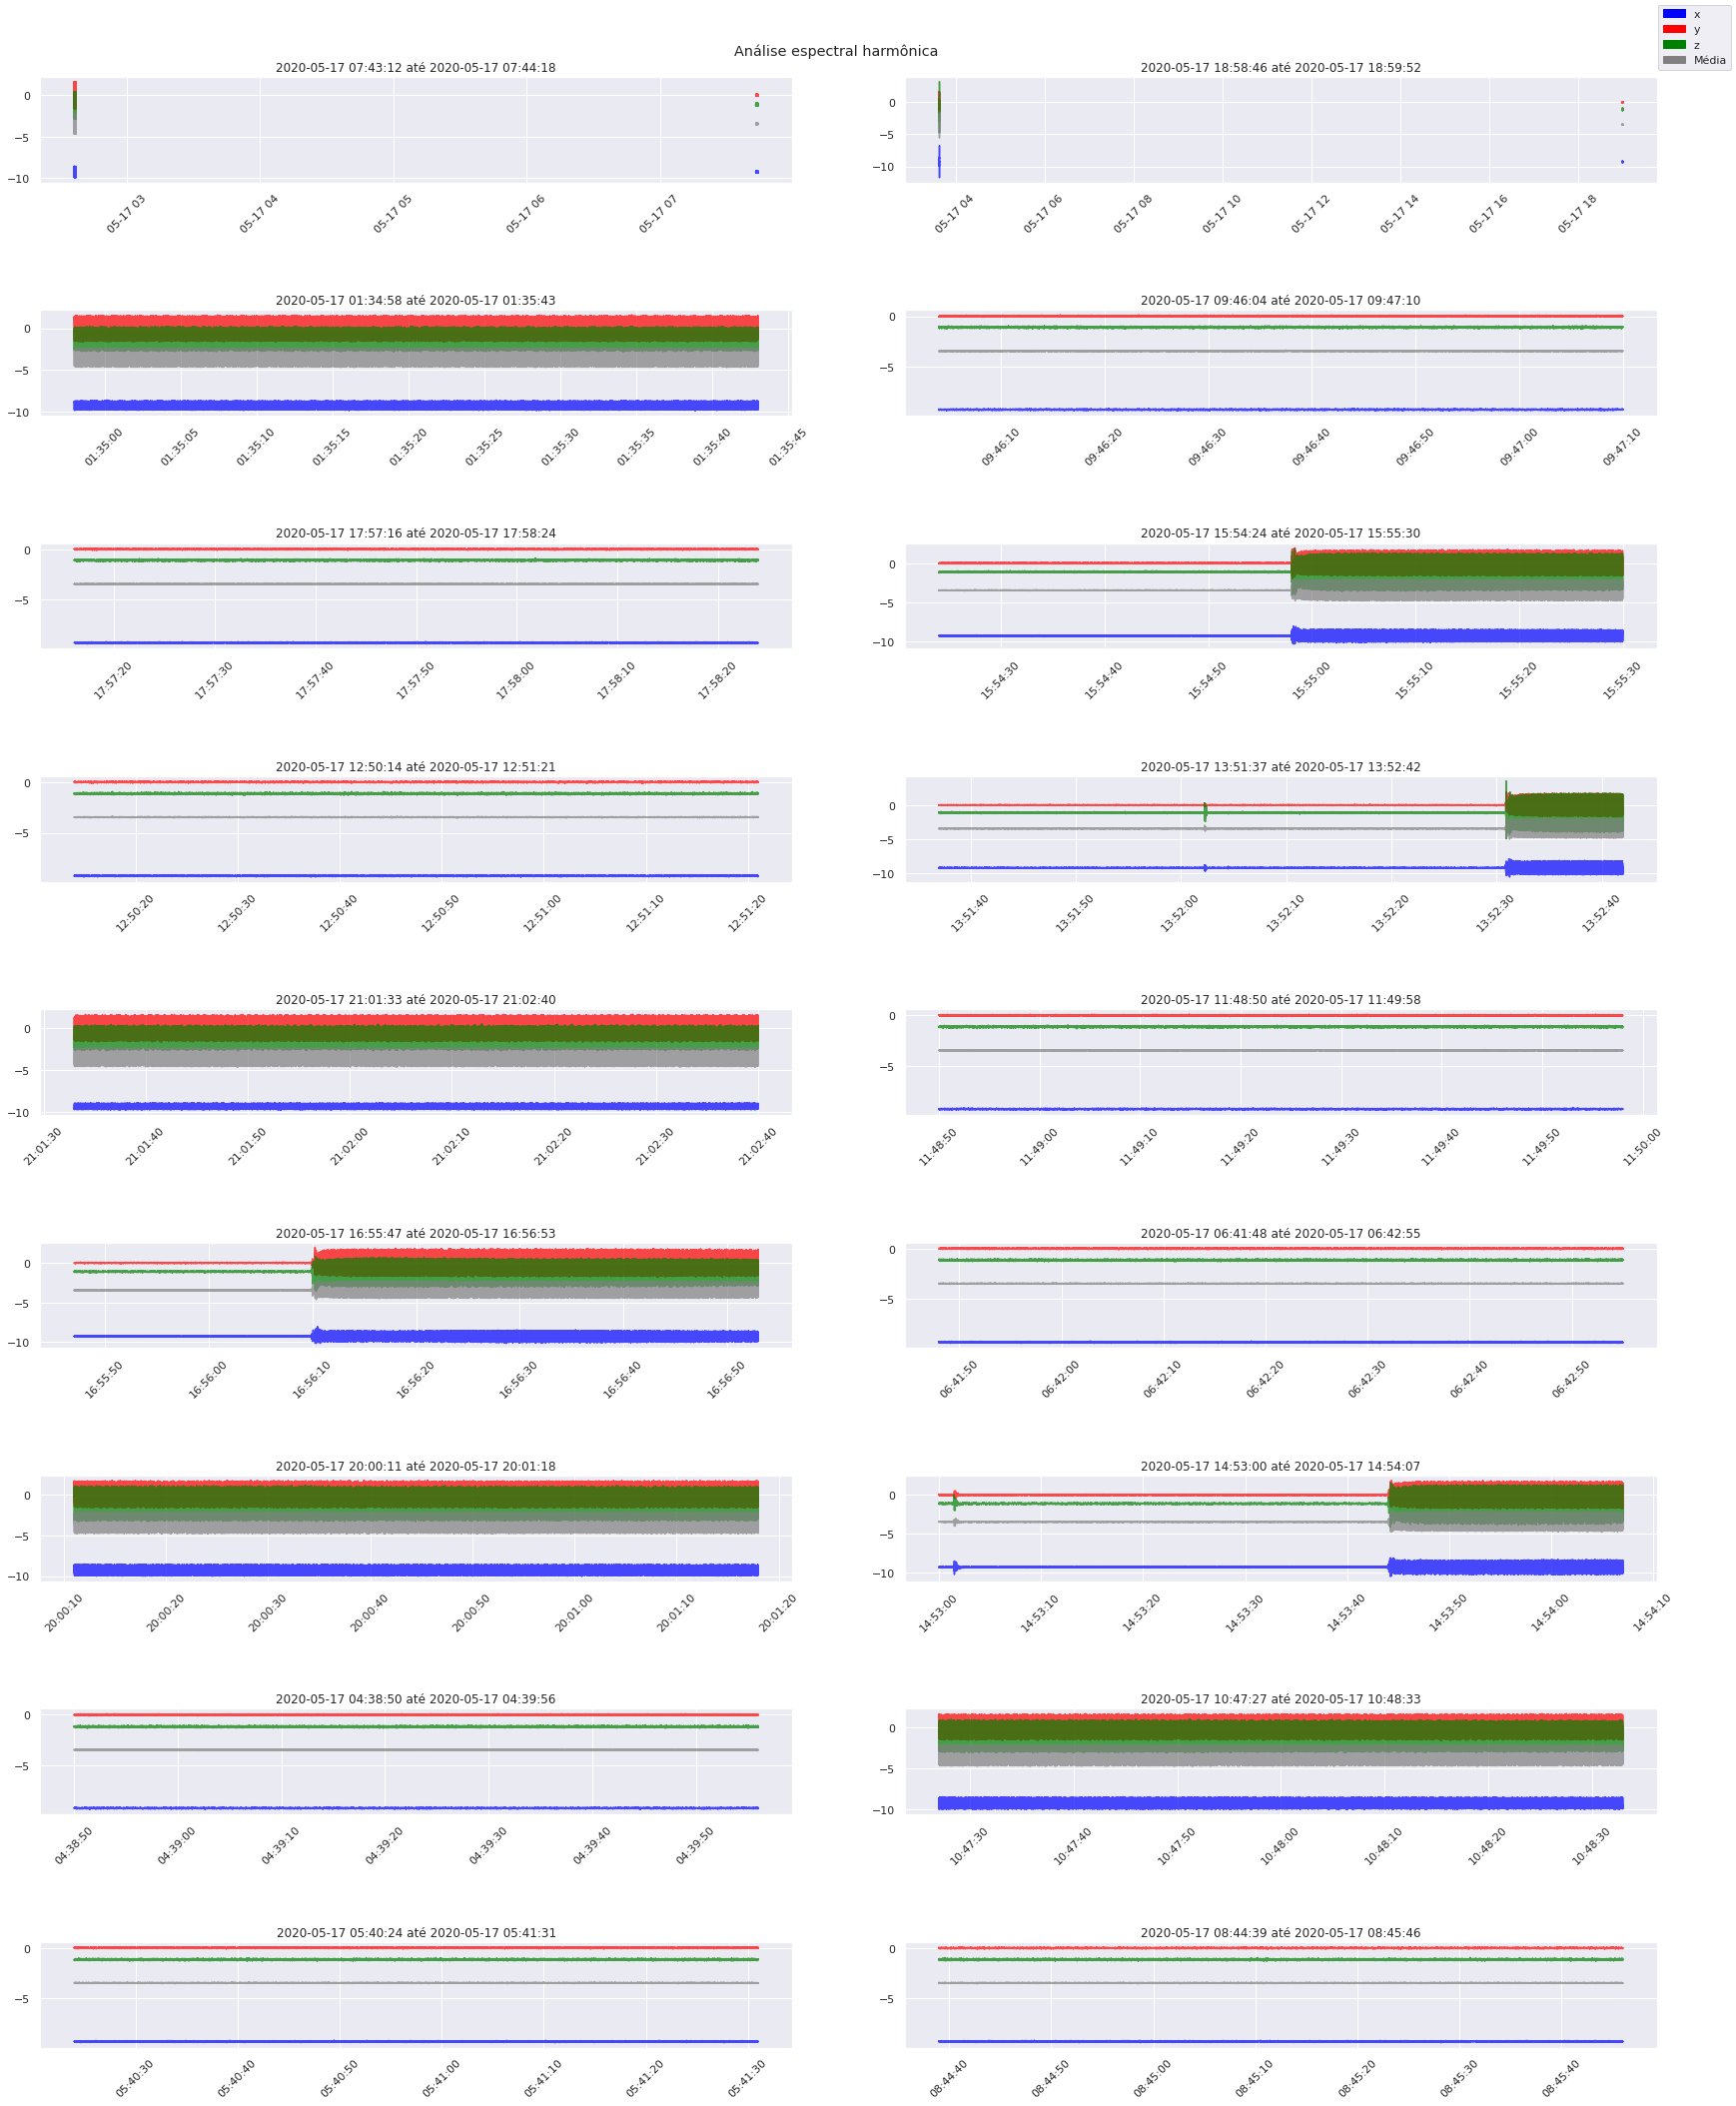

In [ ]:
figure, axis = plt.subplots(10-1, 2,figsize=(25,30))
x,y = 0,0

for tempo,dado in zip(registros,df):
  inicio = tempo['inicio']
  fim = tempo['fim']
  
  t = np.linspace(inicio.value,fim.value,num=dado.shape[0])
  t = pd.to_datetime(t)

  titulo = '{} até {}'.format(inicio,fim)
  
  if(y==2):
    y = 0
    x+=1
  if(x==9):
    x = 0
  
  lineX, = axis[x,y].plot(t,dado['x'],alpha=0.7)
  lineX.set_color('blue')
  lineY, = axis[x,y].plot(t,dado['y'],alpha=0.7)
  lineY.set_color('red')
  lineZ, = axis[x,y].plot(t,dado['z'],alpha=0.7)
  lineZ.set_color('green')
  lineMedia, = axis[x,y].plot(t,dado['media'],alpha=0.7)
  lineMedia.set_color('gray')
  axis[x,y].set_title(titulo)
  axis[x,y].tick_params(axis='x',labelrotation=45,)

  y+=1

figure.suptitle('Análise espectral harmônica')
blue_patch = mpatches.Patch(color='blue', label='x')
red_patch = mpatches.Patch(color='red', label='y')
green_patch = mpatches.Patch(color='green', label='z')
gray_patch = mpatches.Patch(color='gray', label='Média')
figure.legend(handles=[blue_patch, red_patch, green_patch, gray_patch])
figure.tight_layout(pad=5.0)
figure.show()

Podemos perceber períodos que o compressor fica ligado e períodos que não, pode-se inferir que a geladeira seja de algum ambiente noturno ou de algum restaurante, pois ela fica ligada em períodos específicos de tempo que seria no momento noturno até a madrugada e também no período do almoço.
A razão de ter mantido os dados separados foi que facilitava na interpretação dos intervalos de tempo das diferentes condições da geladeira

## Análise espectral FFT

Abaixo temos a análise espectral a partir da transformada de Fourrier rápida, não tenho tanto conhecimento prático nesta área, muito do que eu sei eu aprendi em Cálculo, então pode ser que haja uma interpretação errada dos dados, pois sei apenas a parte mais teórica e nunca trabalhei muito com isso em Python

Estou me baseando no artigo: https://realpython.com/python-scipy-fft/

Inferi o tempo e a frequência a partir da informação "com menos de 1 minuto cada coleta, de 1 em 1 hora." e também pela quantidade de entradas que existem no intervalo que foi apresentado.

In [ ]:
def generate_sine_wave(freq, sample_rate, duration):
      x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
      frequencies = x * freq
      # 2pi because np.sin takes radians
      y = np.sin((2 * np.pi) * frequencies)

      return x, y

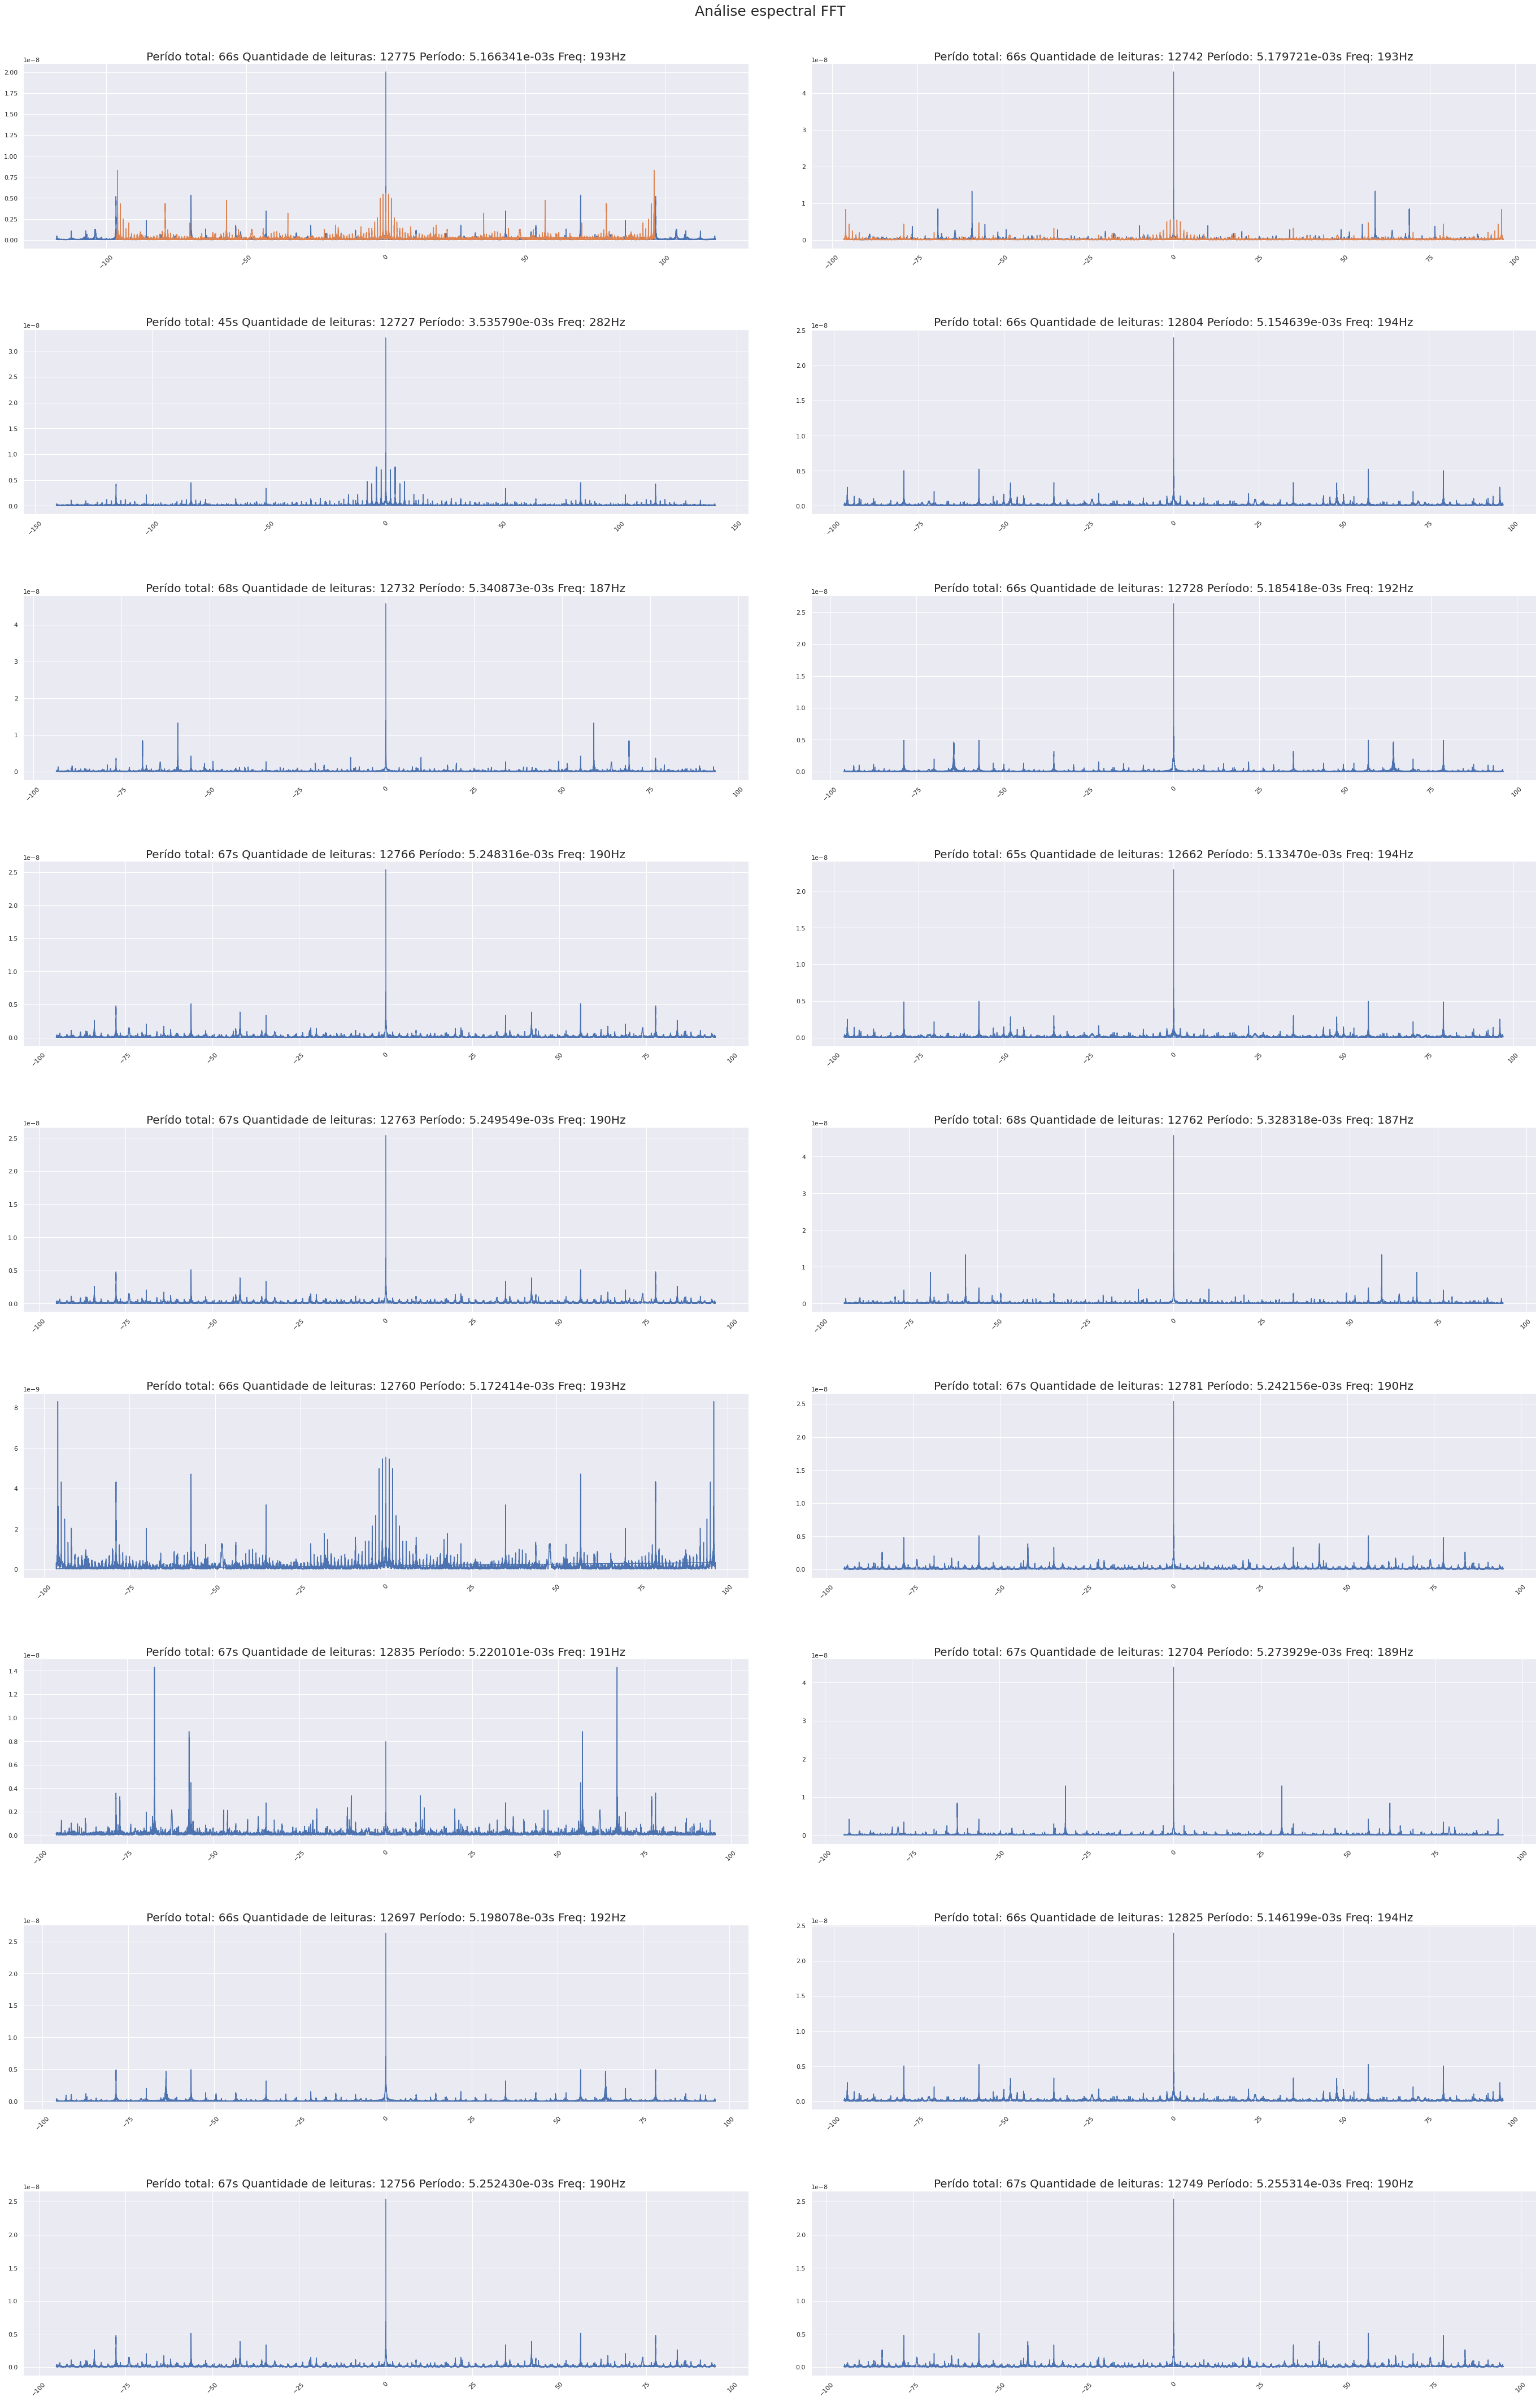

In [ ]:
figure, axis = plt.subplots(10-1, 2,figsize=(40,60))
x,y = 0,0

for tempo,dado in zip(registros,df):
  inicio = tempo['inicio'].time()
  inicio = (inicio.hour * 60 + inicio.minute) * 60 + inicio.second

  fim = tempo['fim'].time()
  fim = (fim.hour * 60 + fim.minute) * 60 + fim.second

  Ttotal = fim-inicio # Período do intervalo total de leitura do compressor
  qtdLeituras = len(dado.index) #Verifica quantas leituras foram feitas no intervalo de tempo acima

  t = Ttotal/qtdLeituras # Período que fariamos cada leitura;
  f = 1/t # Frequência (Hz) que estamos lendo o compressor

  titulo = 'Perído total: {}s Quantidade de leituras: {} Período: {:e}s Freq: {}Hz'.format(Ttotal,qtdLeituras,t,int(f))
  
  if(y==2):
    y = 0
    x+=1
  if(x==9):
    x = 0
  
  X, Y = generate_sine_wave(int(f), int(f), Ttotal) # Retorna uma onda senoidal a partir das informações coletadas

  N = int(f) * Ttotal

  yf = fft(Y)
  xf = fftfreq(N, 1 / int(f))

  axis[x,y].plot(xf, np.abs(yf))
  axis[x,y].set_title(titulo, fontsize=20)
  axis[x,y].tick_params(axis='x',labelrotation=45,)

  y+=1

figure.suptitle('Análise espectral FFT\n',y=1, fontsize=25)
figure.tight_layout(pad=7.0)
figure.show()

Acima temos a análise espectral FFT, mas pra que ela vai servir ? Então, o foco dela é entender a frequência de uma certa onda, facilitando com que ruídos possam ser mais bem interpretados, ou seja, há um certo entendimento que quais foram os picos e vales de funcionamentos e leituras dos dados, mesmo que apenas a frequência e o período dessas informações fossem relevantes.

Essa foi minha interpretação, reitero que apenas tenho conhecimentos dessas aplicações no quesito de diminuição de ruídos em áudios e não em quesitos de avaliação espacial de algum sensor. Mas espero que possa aprender mais sobre.


# Desafio 2
Fazer um Algoritmo que calcula automaticamente quanto tempo a geladeira ficou ligada (uptime) e quanto tempo ela ficou desligada (downtime).

Pretendo resolver este problemas a partir de uma avaliação de funcionamento a priori pra saber qual é disposição dos eixos quando ela está ligada e assim descobrir a sua média de funcionamento quando está ligada ou desligada

Mas por que não criar um algoritmo de regressão para detectar se está funcionando ?
  - 1. Vamos estar matando uma barata com uma bomba atômica, ou seja, existem formas de detectar isso de uma maneira mais simples
  - 2. Imagine que uma geladeira ou qualquer eletrônico seja inventado em que ele diminuam o consumo de energia do aparelho, ou seja, exista menos movimento, então teríamos falsos negativos na definição se o dispositivo está ligado ou não
  - 3. Cada aparelho tem sua própria frequência ou capacidade de movimento, se definirmos ou treinarmos uma regressão para um específico, talvez não podemos utilizar em outros

Abaixo eu estou concatenando todos os arquivos de leitura, ou seja, se eu plotar este gráfico, vai ser um resultado totalmente inválido, porém ele é essencial para saber se a partir de um certo intervalo de leitura, quanto tempo ele ficou ligado e quanto tempo ficou desligado

In [ ]:
dados = []

for tempo,dado in zip(registros,df):
  dados.append(dado)

dfAll = pd.concat(dados,ignore_index=True)

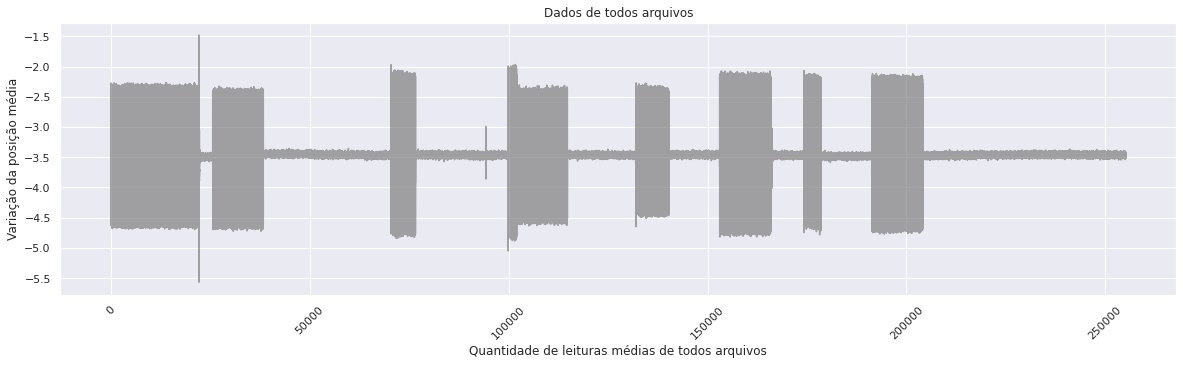

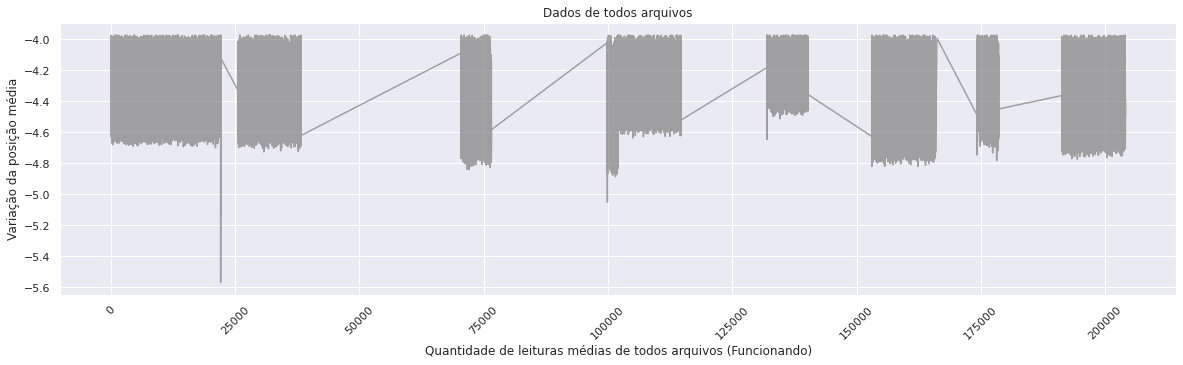

In [ ]:
mediaAtiva = dfAll.copy() # Copiamos os dados do dataframe que possui a média das medições

media = mediaAtiva['media'].mean() # Definimos qual a média dos mediçoes
desvioPadrao = mediaAtiva['media'].std() # Definimos o desvio padrão das médias

funcionando = media-desvioPadrao # Calcula-se um valor parcial baixo de quando o compreensor está funcionando

indexNames = mediaAtiva[ abs(mediaAtiva['media']) < abs(funcionando) ].index # Pegamos os indíces que estão acima da metade do valor parcial de funcionamento
mediaAtiva.drop(indexNames, inplace=True) # Removemos os dados de quando o compressor está desligado

plt.figure(figsize=(20,5))

lineMedia, = plt.plot(dfAll['media'],alpha=0.7)
lineMedia.set_color('gray')
plt.title('Dados de todos arquivos')
plt.tick_params(axis='x',labelrotation=45)

plt.ylabel('Variação da posição média')
plt.xlabel('Quantidade de leituras médias de todos arquivos')
plt.show()

print()

plt.figure(figsize=(20,5))

lineMedia, = plt.plot(mediaAtiva['media'],alpha=0.7)
lineMedia.set_color('gray')
plt.title('Dados de todos arquivos')
plt.tick_params(axis='x',labelrotation=45)

plt.ylabel('Variação da posição média')
plt.xlabel('Quantidade de leituras médias de todos arquivos (Funcionando)')
plt.show()

A partir dos testes feitos acima, podemos imaginar em como vamos calcular os tempo de funcionamento, tanto uptime quando downtime

Por isso vamos criar a função abaixo que recebe os dados coletados e as timestamps de cada época e retorna o uptime e downtime

In [ ]:
status = [] # Vou usar esta lista para me referir no desafio 3

In [ ]:
def status_geladeira(tempo,dado):
  inicio = tempo['inicio']
  fim = tempo['fim']

  titulo = '{} até {}'.format(inicio,fim)

  inicio = tempo['inicio'].time()
  inicio = (inicio.hour * 60 + inicio.minute) * 60 + inicio.second

  fim = tempo['fim'].time()
  fim = (fim.hour * 60 + fim.minute) * 60 + fim.second

  Ttotal = fim-inicio # Período do intervalo total de leitura do compressor
  qtdLeituras = len(dado.index) #Verifica quantas leituras foram feitas no intervalo de tempo acima

  t = Ttotal/qtdLeituras # Período que fariamos cada leitura;

  mediaAtiva = dado.copy() # Copiamos os dados do dataframe que possui a média das medições

  media = mediaAtiva['media'].mean() # Definimos qual a média dos mediçoes
  desvioPadrao = mediaAtiva['media'].std() # Definimos o desvio padrão das médias

  indexNames = mediaAtiva[ abs(mediaAtiva['media']) < abs(funcionando) ].index # Pegamos os indíces que estão acima da metade do valor parcial de funcionamento
  
  qtdOcioso = len(indexNames)
  
  if(qtdOcioso == qtdLeituras): # Há uma indeterminação se o downtime possui a mesma quantideade de leituras
    qtdOcioso = 0

  plt.figure(figsize=(20,5))

  lineMedia, = plt.plot(dado['media'],alpha=0.7)
  lineMedia.set_color('gray')
  plt.title(titulo)
  plt.tick_params(axis='x',labelrotation=45)

  plt.ylabel('Variação da posição média')
  plt.xlabel('Quantidade de leituras médias de todos arquivos')
  plt.show()

  print()

  downTime = qtdOcioso*t
  upTime = Ttotal-downTime

  status.append('Tempo total: {}s Uptime: {:.2f}s Downtime: {:.2f}s\n'.format(Ttotal,upTime,downTime));

  print(status[i])

Gráfico  1


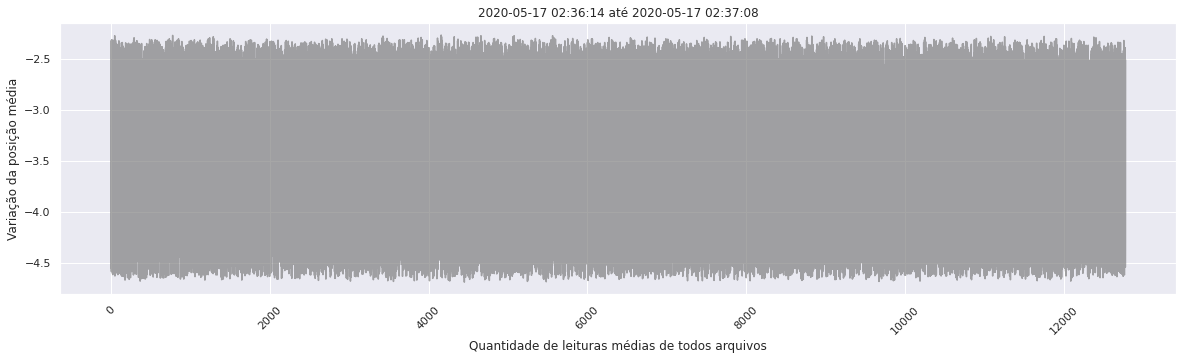


Tempo total: 54s Uptime: 19.41s Downtime: 34.59s

Gráfico  2


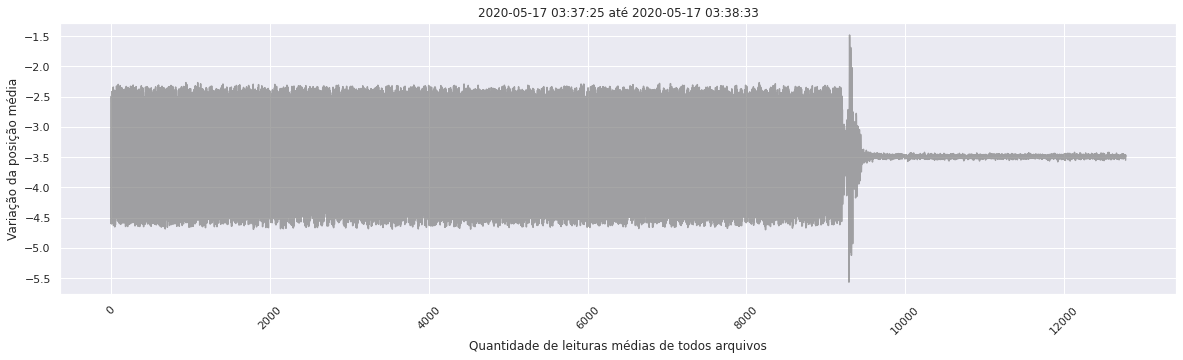


Tempo total: 68s Uptime: 17.80s Downtime: 50.20s

Gráfico  3


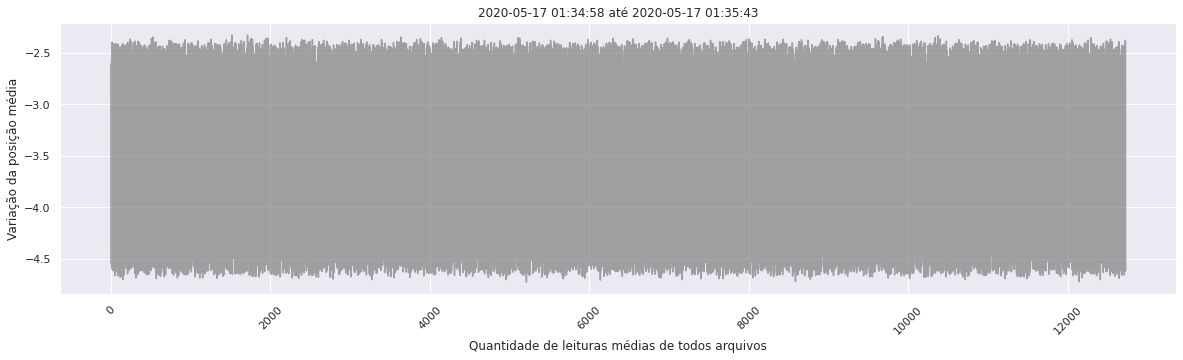


Tempo total: 45s Uptime: 16.54s Downtime: 28.46s

Gráfico  4


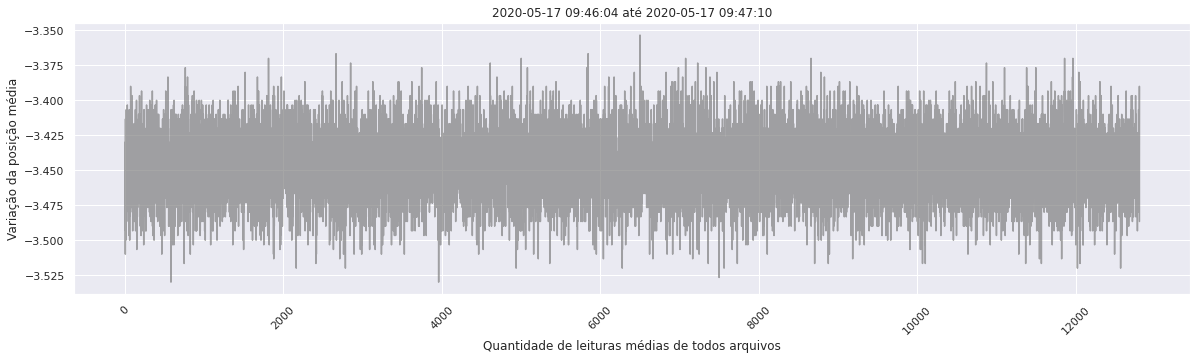


Tempo total: 66s Uptime: 66.00s Downtime: 0.00s

Gráfico  5


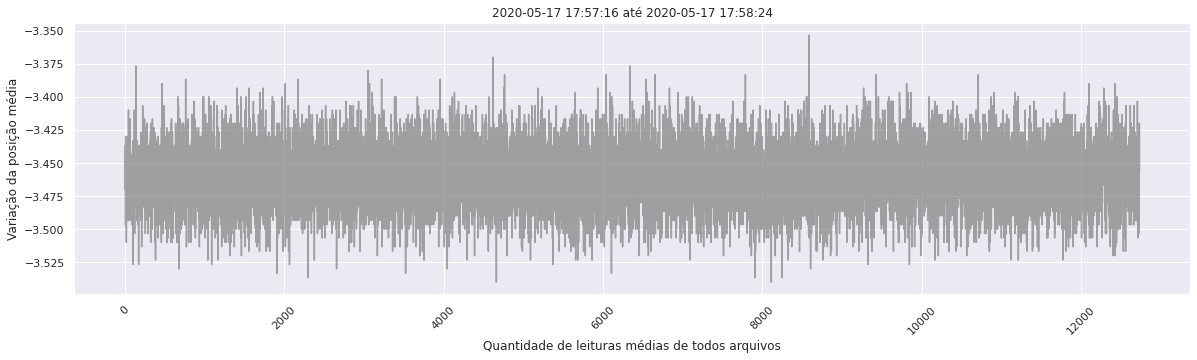


Tempo total: 68s Uptime: 68.00s Downtime: 0.00s

Gráfico  6


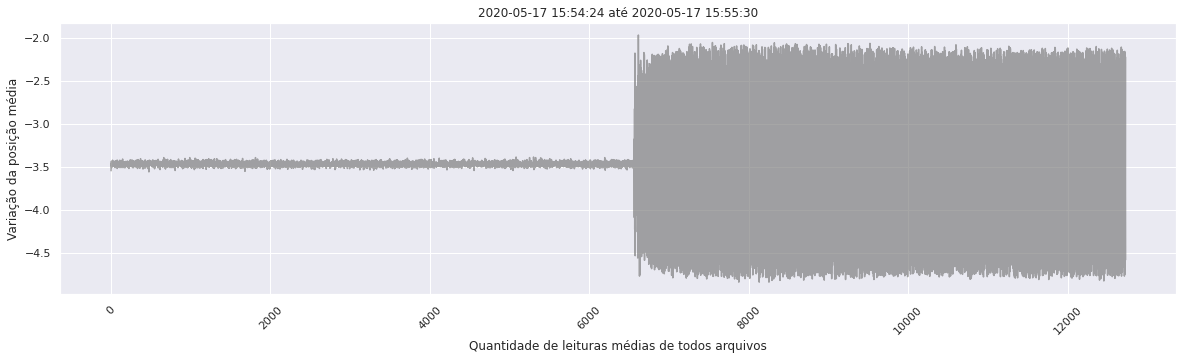


Tempo total: 66s Uptime: 12.05s Downtime: 53.95s

Gráfico  7


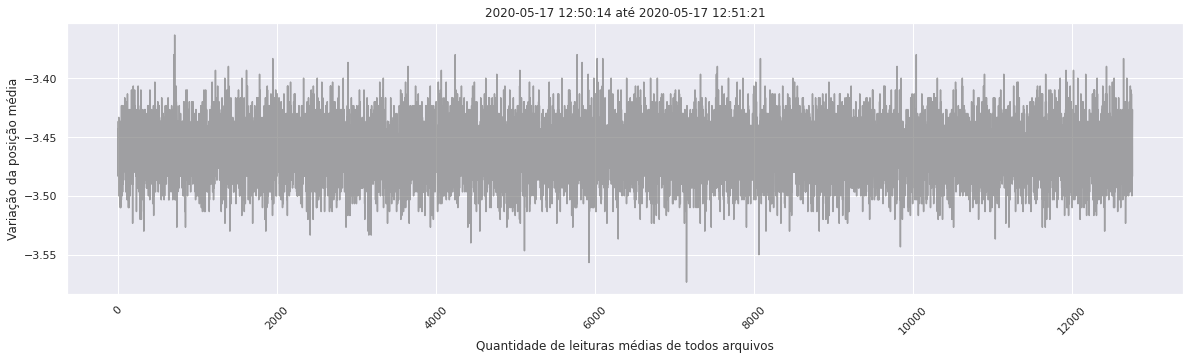


Tempo total: 67s Uptime: 67.00s Downtime: 0.00s

Gráfico  8


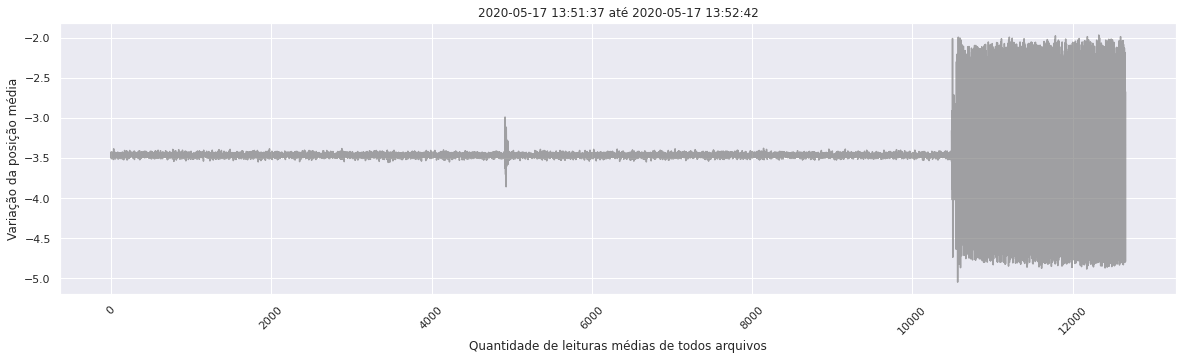


Tempo total: 65s Uptime: 4.20s Downtime: 60.80s

Gráfico  9


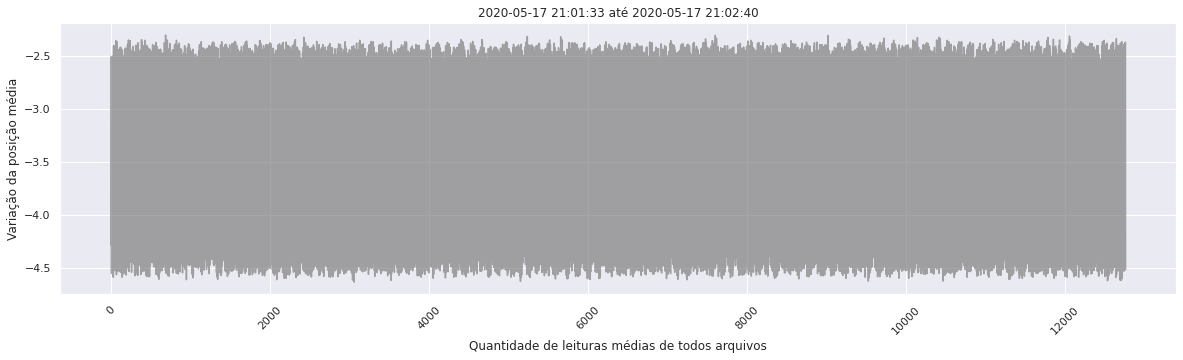


Tempo total: 67s Uptime: 23.26s Downtime: 43.74s

Gráfico  10


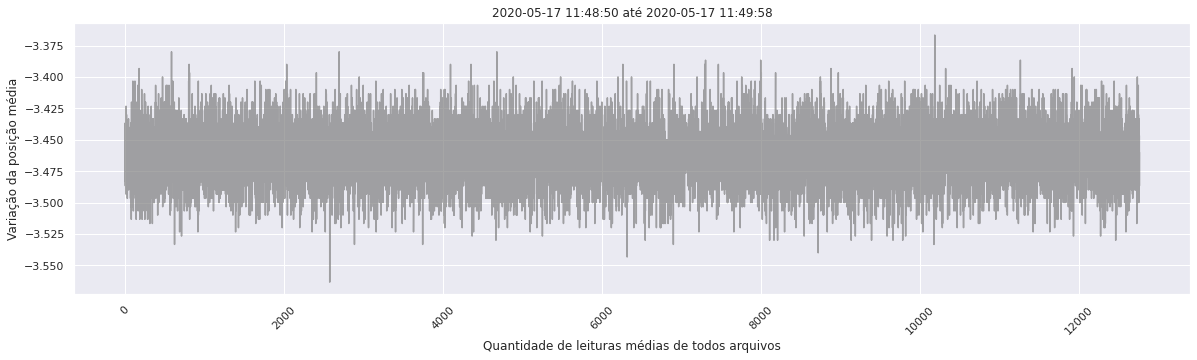


Tempo total: 68s Uptime: 68.00s Downtime: 0.00s

Gráfico  11


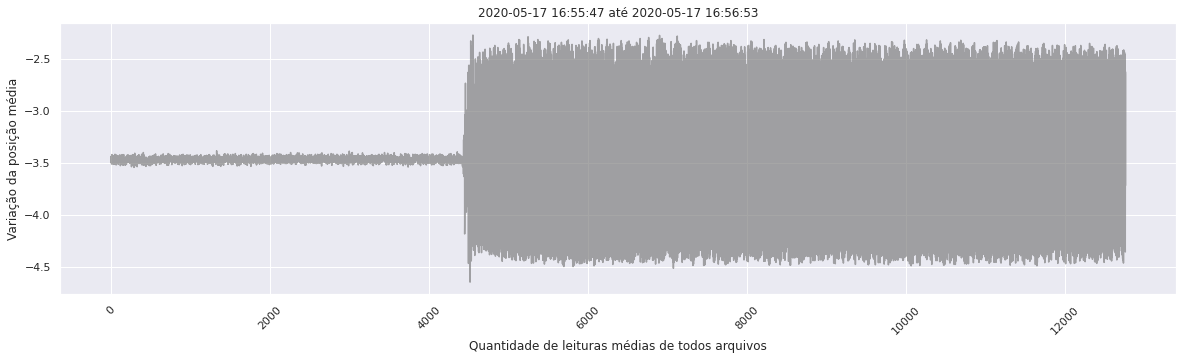


Tempo total: 66s Uptime: 14.60s Downtime: 51.40s

Gráfico  12


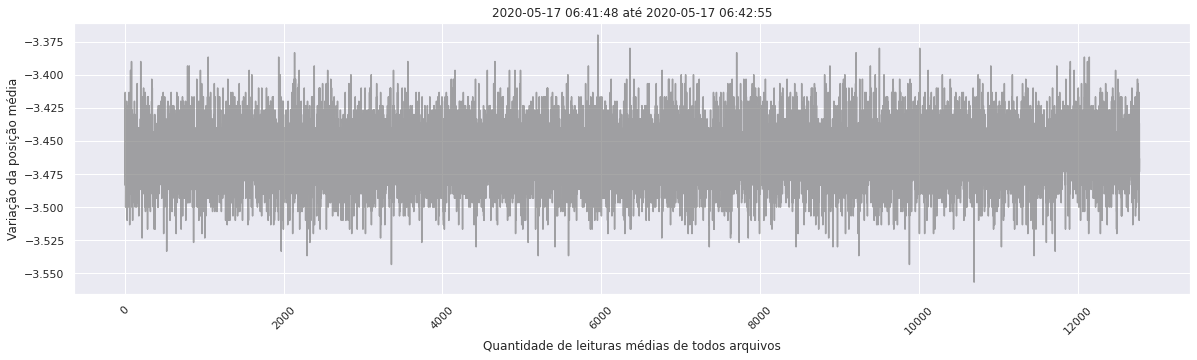


Tempo total: 67s Uptime: 67.00s Downtime: 0.00s

Gráfico  13


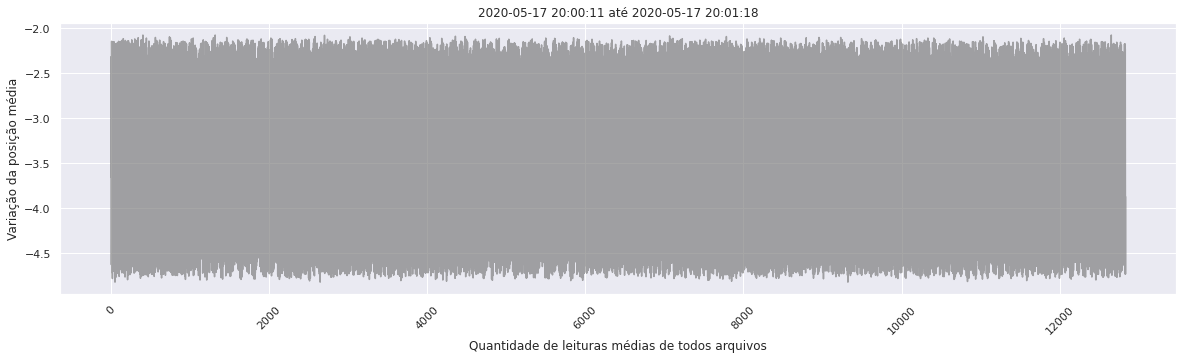


Tempo total: 67s Uptime: 25.04s Downtime: 41.96s

Gráfico  14


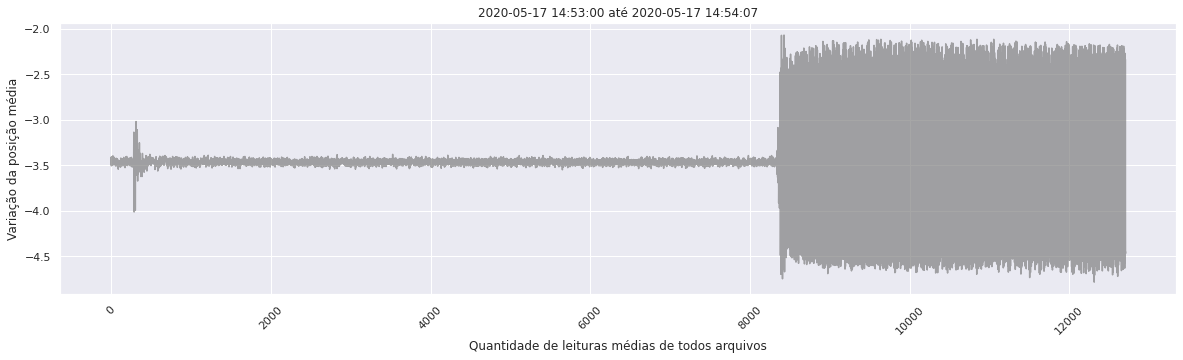


Tempo total: 67s Uptime: 8.46s Downtime: 58.54s

Gráfico  15


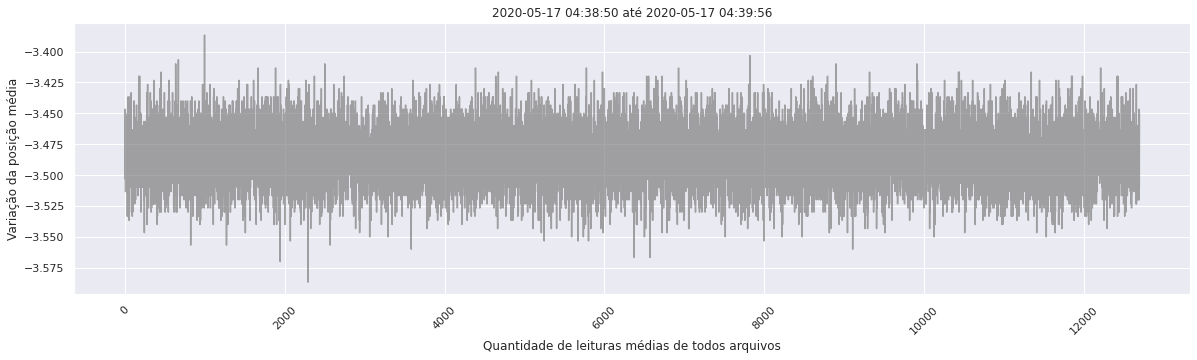


Tempo total: 66s Uptime: 66.00s Downtime: 0.00s

Gráfico  16


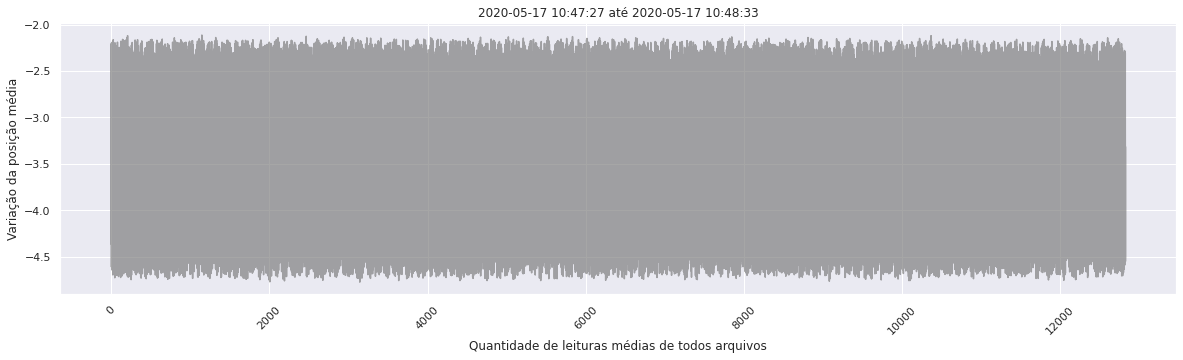


Tempo total: 66s Uptime: 24.00s Downtime: 42.00s

Gráfico  17


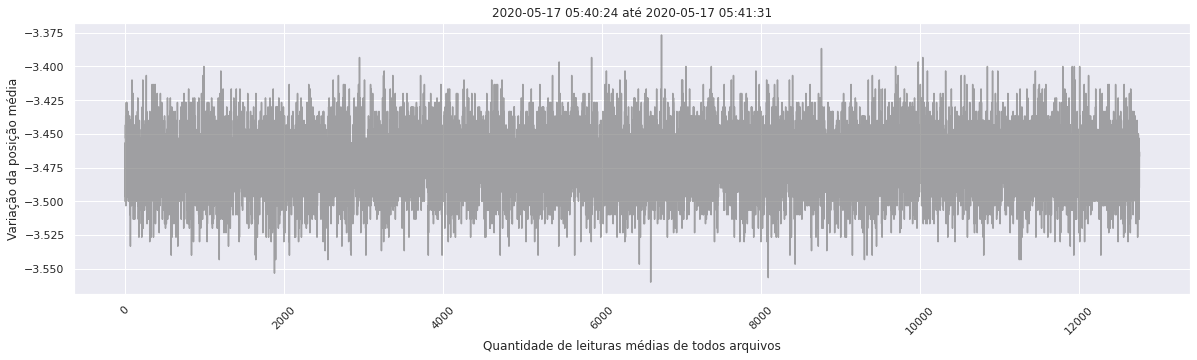


Tempo total: 67s Uptime: 67.00s Downtime: 0.00s

Gráfico  18


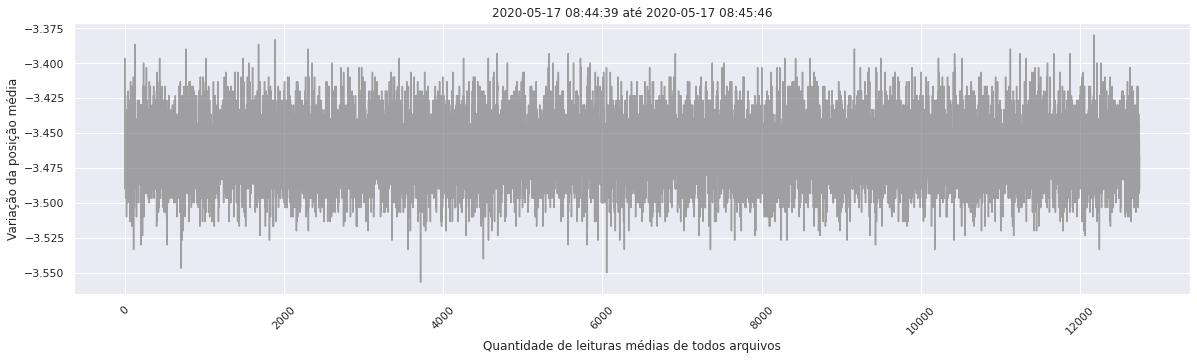


Tempo total: 67s Uptime: 67.00s Downtime: 0.00s

Gráfico  19


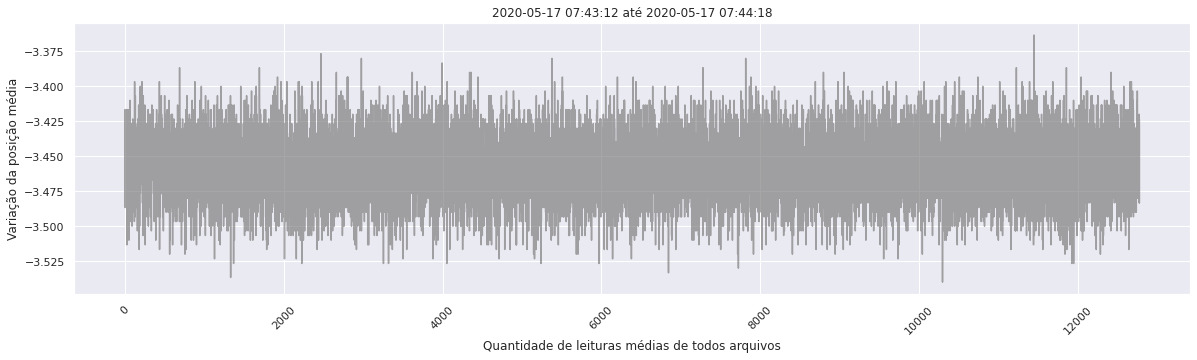


Tempo total: 66s Uptime: 66.00s Downtime: 0.00s

Gráfico  20


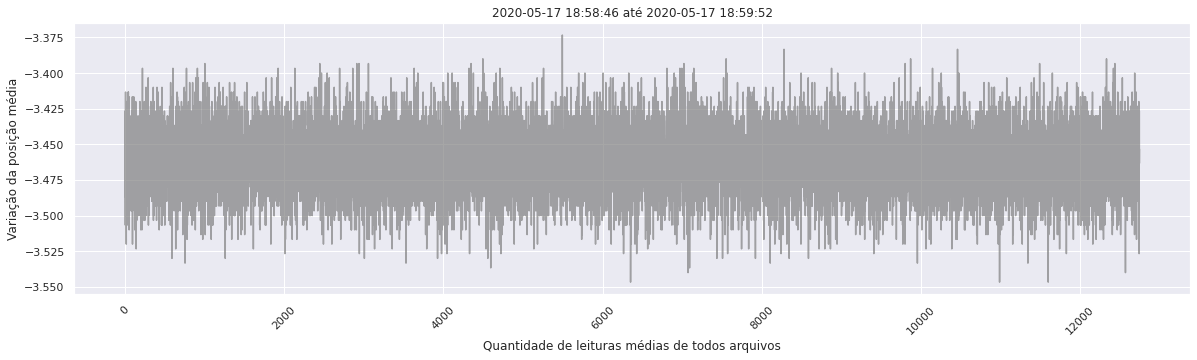


Tempo total: 66s Uptime: 66.00s Downtime: 0.00s



In [ ]:
for i,(tempo,dado) in enumerate(zip(registros,df)):
  print('Gráfico ',i+1)
  status_geladeira(tempo,dado)

Pronto, o segundo desafio foi concluído, percebi alguns detalhes que irei descrever no desafio 3, o qual creio que seja consequências dos resultados acima, sem spoilers, vou direto a ele e tentar entender o por que de alguns resultados parecem incoerentes

# Desafio 3

Fazer sua análise sobre a condição do compressor da geladeira, está desbalanceado? Desalinhado? Que condição se encontra.

Para cada análise, temos que entender os gráficos, por isso irei mostrá-los a cada explicação, escolhi a partir dos gráficos acima, três gráficos específicos que sustem minhas interpretações

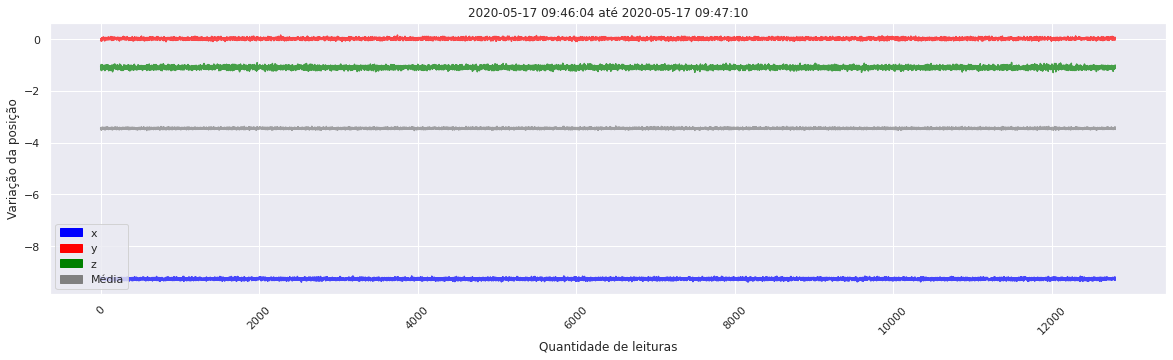

Tempo total: 66s Uptime: 66.00s Downtime: 0.00s



In [ ]:
dado = df[3]
tempo = registros[3]
status3 = status[3]

inicio = tempo['inicio']
fim = tempo['fim']

titulo = '{} até {}'.format(inicio,fim)

plt.figure(figsize=(20,5))

lineX, = plt.plot(dado['x'],alpha=0.7)
lineX.set_color('blue')
lineY, = plt.plot(dado['y'],alpha=0.7)
lineY.set_color('red')
lineZ, = plt.plot(dado['z'],alpha=0.7)
lineZ.set_color('green')
lineMedia, = plt.plot(dado['media'],alpha=0.7)
lineMedia.set_color('gray')
plt.tick_params(axis='x',labelrotation=45,)


plt.title(titulo)
plt.tick_params(axis='x',labelrotation=45)

blue_patch = mpatches.Patch(color='blue', label='x')
red_patch = mpatches.Patch(color='red', label='y')
green_patch = mpatches.Patch(color='green', label='z')
gray_patch = mpatches.Patch(color='gray', label='Média')
plt.legend(handles=[blue_patch, red_patch, green_patch, gray_patch])

plt.ylabel('Variação da posição')
plt.xlabel('Quantidade de leituras')
plt.show()

print(status3)

Acima temos o gráfico 4, ele está funcionando totalmente, percebemos ele está funcionando da maneira correta e eixos mantém a média de suas posições, este seria o funcionamento ideal do compressor

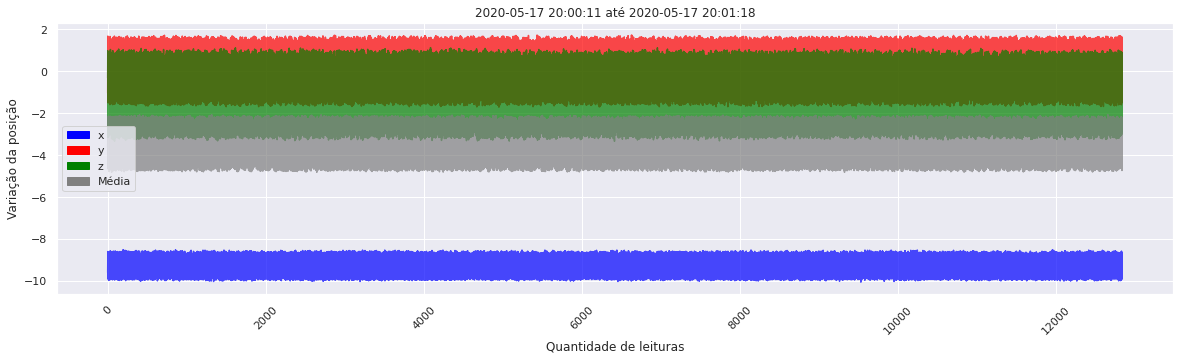

Tempo total: 67s Uptime: 25.04s Downtime: 41.96s



In [ ]:
dado = df[12]
tempo = registros[12]
status12 = status[12]

inicio = tempo['inicio']
fim = tempo['fim']

titulo = '{} até {}'.format(inicio,fim)

plt.figure(figsize=(20,5))


lineX, = plt.plot(dado['x'],alpha=0.7)
lineX.set_color('blue')
lineY, = plt.plot(dado['y'],alpha=0.7)
lineY.set_color('red')
lineZ, = plt.plot(dado['z'],alpha=0.7)
lineZ.set_color('green')
lineMedia, = plt.plot(dado['media'],alpha=0.7)
lineMedia.set_color('gray')
plt.tick_params(axis='x',labelrotation=45,)


plt.title(titulo)
plt.tick_params(axis='x',labelrotation=45)

blue_patch = mpatches.Patch(color='blue', label='x')
red_patch = mpatches.Patch(color='red', label='y')
green_patch = mpatches.Patch(color='green', label='z')
gray_patch = mpatches.Patch(color='gray', label='Média')
plt.legend(handles=[blue_patch, red_patch, green_patch, gray_patch])

plt.ylabel('Variação da posição')
plt.xlabel('Quantidade de leituras')
plt.show()

print(status12)

Acima temos o gráfico 13, percebemos que ele está totalmente desalinhado, pois os eixos variam bastante da sua posição original, consequentemente, percebemos que o downtime de compressores nessa situação são grandes, tornando o aparelho ocioso, isto podemos inferir a partir dos resultados do desafio 2, percebemos também que ele esta desbalanceado, principalmente pois existem eixos que variam mais do que outros

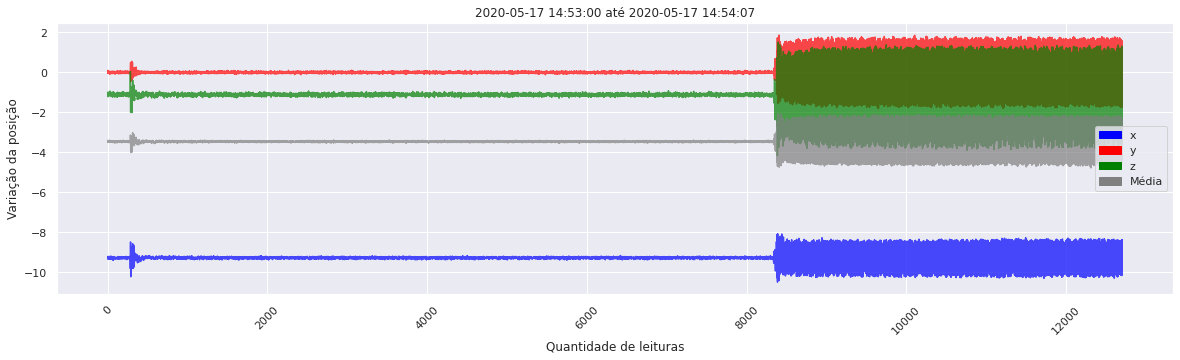

Tempo total: 67s Uptime: 8.46s Downtime: 58.54s



In [ ]:
dado = df[13]
tempo = registros[13]
status13 = status[13]

inicio = tempo['inicio']
fim = tempo['fim']

titulo = '{} até {}'.format(inicio,fim)

plt.figure(figsize=(20,5))


lineX, = plt.plot(dado['x'],alpha=0.7)
lineX.set_color('blue')
lineY, = plt.plot(dado['y'],alpha=0.7)
lineY.set_color('red')
lineZ, = plt.plot(dado['z'],alpha=0.7)
lineZ.set_color('green')
lineMedia, = plt.plot(dado['media'],alpha=0.7)
lineMedia.set_color('gray')
plt.tick_params(axis='x',labelrotation=45,)


plt.title(titulo)
plt.tick_params(axis='x',labelrotation=45)

blue_patch = mpatches.Patch(color='blue', label='x')
red_patch = mpatches.Patch(color='red', label='y')
green_patch = mpatches.Patch(color='green', label='z')
gray_patch = mpatches.Patch(color='gray', label='Média')
plt.legend(handles=[blue_patch, red_patch, green_patch, gray_patch])

plt.ylabel('Variação da posição')
plt.xlabel('Quantidade de leituras')
plt.show()

print(status13)

O gráfico acima é o 14, nele percebemos que existem alguns momentos que mesmo ligado, o compressor sofre algumas alterações, pode ser por variação de voltagem ou por um momento que a geladeira ficou aberta, percebemos que o downtime é grande também acima pois entramos na mesma situação da análise acima

# Conclusão

Gostei da experiência de analisar os dados ofertados, nunca tinha trabalhado com dados espaciais desse tipo, creio que minha interpretação pode ter sido errônea em certos aspectos, mas gostei dos resultados e da experiência de ter aprendido mais sobre Matplot e também o FFT do Scipy, já utilizei várias ferramentas do SciPy, porém não tinha conhecimento desta, aprendi muito. Muito obrigado pela oportunidade.